Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist 
import numpy as np
import matplotlib.pyplot as plt
import random

Loading Mnist Data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() ##x== images and y== label
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Showing Images

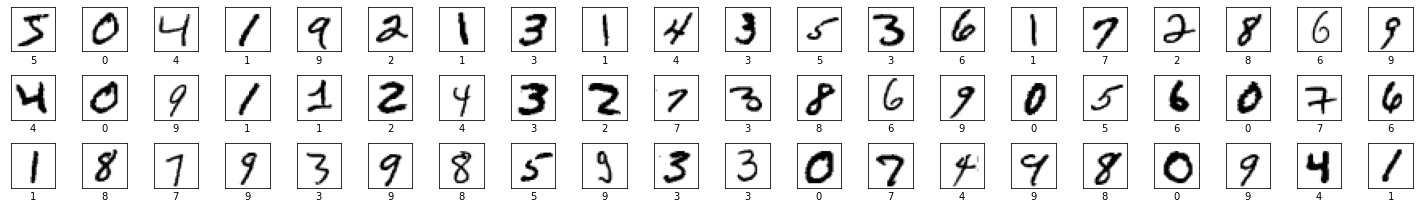

In [3]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

Data Preprocessing

In [4]:
x_train = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") / 255.0

Build The Model

In [5]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])

Model Defination

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

Compile Using Adam Optimizer

In [15]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
   metrics=['accuracy']
)

Compile Using SGD Optimizer

In [16]:
#model.compile(
#     optimizer='sgd', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
#)

Compile Using Adam RMSPROP

In [17]:
#model.compile(
#     optimizer='rmsprop', 
#     loss='sparse_categorical_crossentropy', 
#     metrics=['accuracy']
#)

Train The Model

In [18]:
h = model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0177 - accuracy: 0.9949 - val_loss: 0.0466 - val_accuracy: 0.9892
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0528 - val_accuracy: 0.9897
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0471 - val_accuracy: 0.9904
Epoch 4/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.0398 - val_accuracy: 0.9902
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0489 - val_accuracy: 0.9909
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.0476 - val_accuracy: 0.9893
Epoch 7/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0081 - accuracy: 0.9972 - val_loss: 0.0601 -

Ploting Training Result

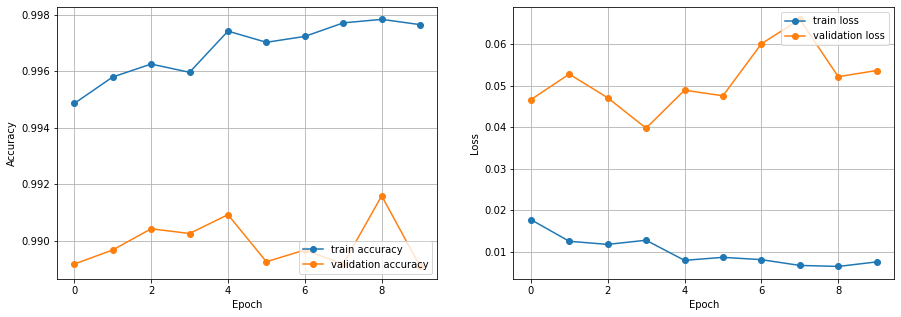

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

Evaluating The Model on The Test Dataset

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.0555 - accuracy: 0.9899

Test Accuracy: 0.9898999929428101

Test Loss: 0.05548996105790138


Make Predictions on The Entire Test Images

In [21]:
predictions = model.predict(x_test)

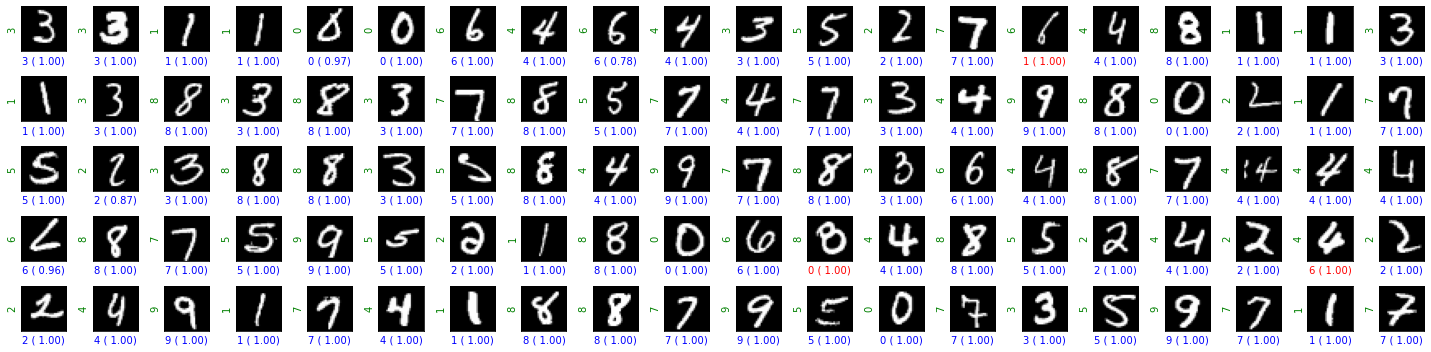

In [22]:
ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(20,5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()